## House Price Prediction Using Linear Regression

### Goal
To predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### Importing Useful Libraries

In [51]:
import pandas as pd #working with csv file data
import numpy as np # for linear algebra and mathematical calculation
import matplotlib.pyplot as plt #for data visualization purpose
import seaborn as sns # for visualization 
from sklearn import ensemble, tree, linear_model #linear model import i.e linear regression and other
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [52]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

##### For proper explanation of datasets variable check data_description.csv

In [53]:
#check for top 5 values in training data set
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
#check for tail/bottom values in training data set
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [55]:
#lets check value counts and other useful thing by making use of describe fuction of pandas:

train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
#lets check for the shape of data 
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [58]:
#Check for duplicate ids in a data set
uniqueIDs = len(set(train_data.Id))
totalIDs = train_data.shape[0]
duplicateIDs = totalIDs - uniqueIDs

print("The Number of Duplicate IDs in Train_Data is:", duplicateIDs)

train_data.drop(['Id'], axis = 1, inplace = True)

The Number of Duplicate IDs in Train_Data is: 0


### Visualization

<AxesSubplot:>

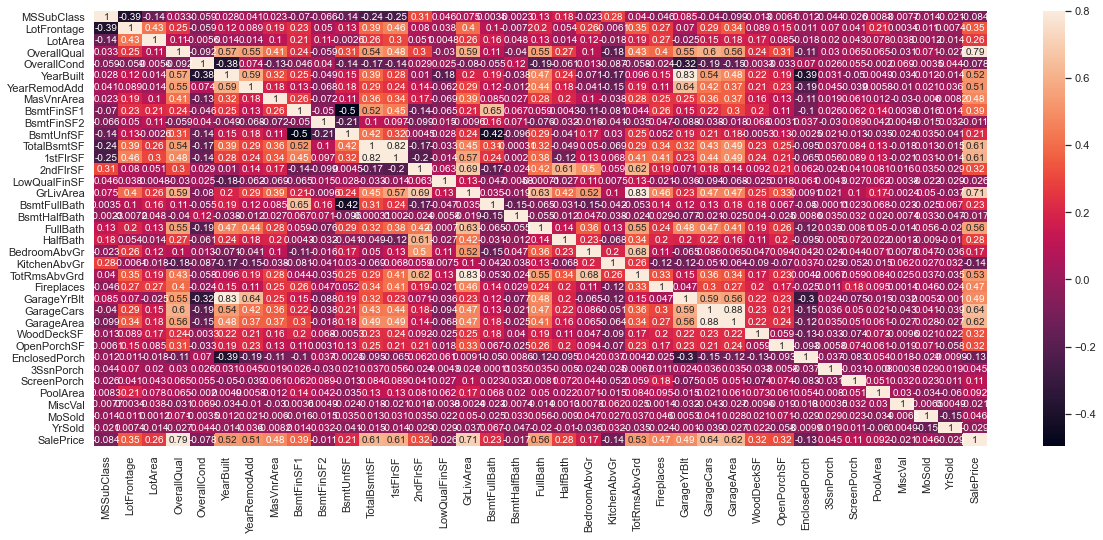

In [59]:
#Correlation

corr_matrix = train_data.corr()
f , ax = plt.subplots(figsize = (20, 8))
sns.heatmap(corr_matrix, vmax = .8, annot = True)

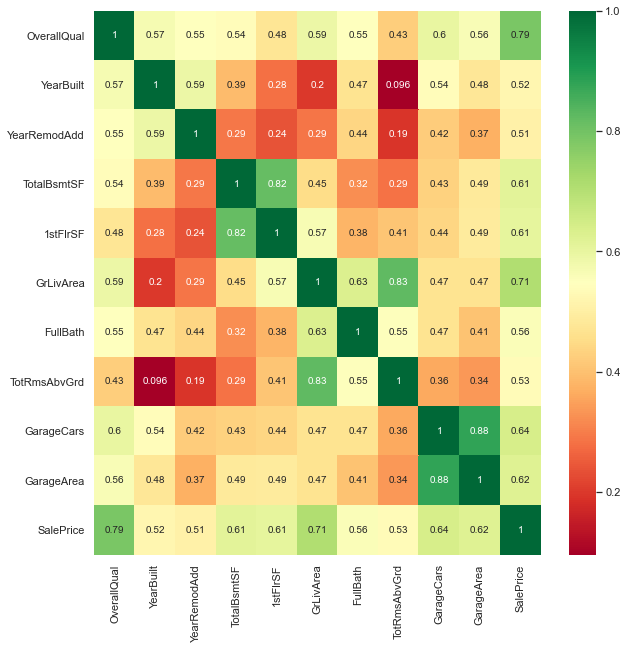

In [60]:
# Lets check for most correlated feature in dataset

top_corr_features = corr_matrix.index[abs(corr_matrix['SalePrice'])>0.5]
plt.figure(figsize=(10,10))

g = sns.heatmap(train_data[top_corr_features].corr(), annot= True, cmap="RdYlGn")

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

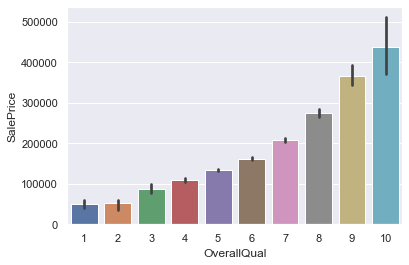

In [61]:
sns.barplot(train_data.OverallQual, train_data.SalePrice)

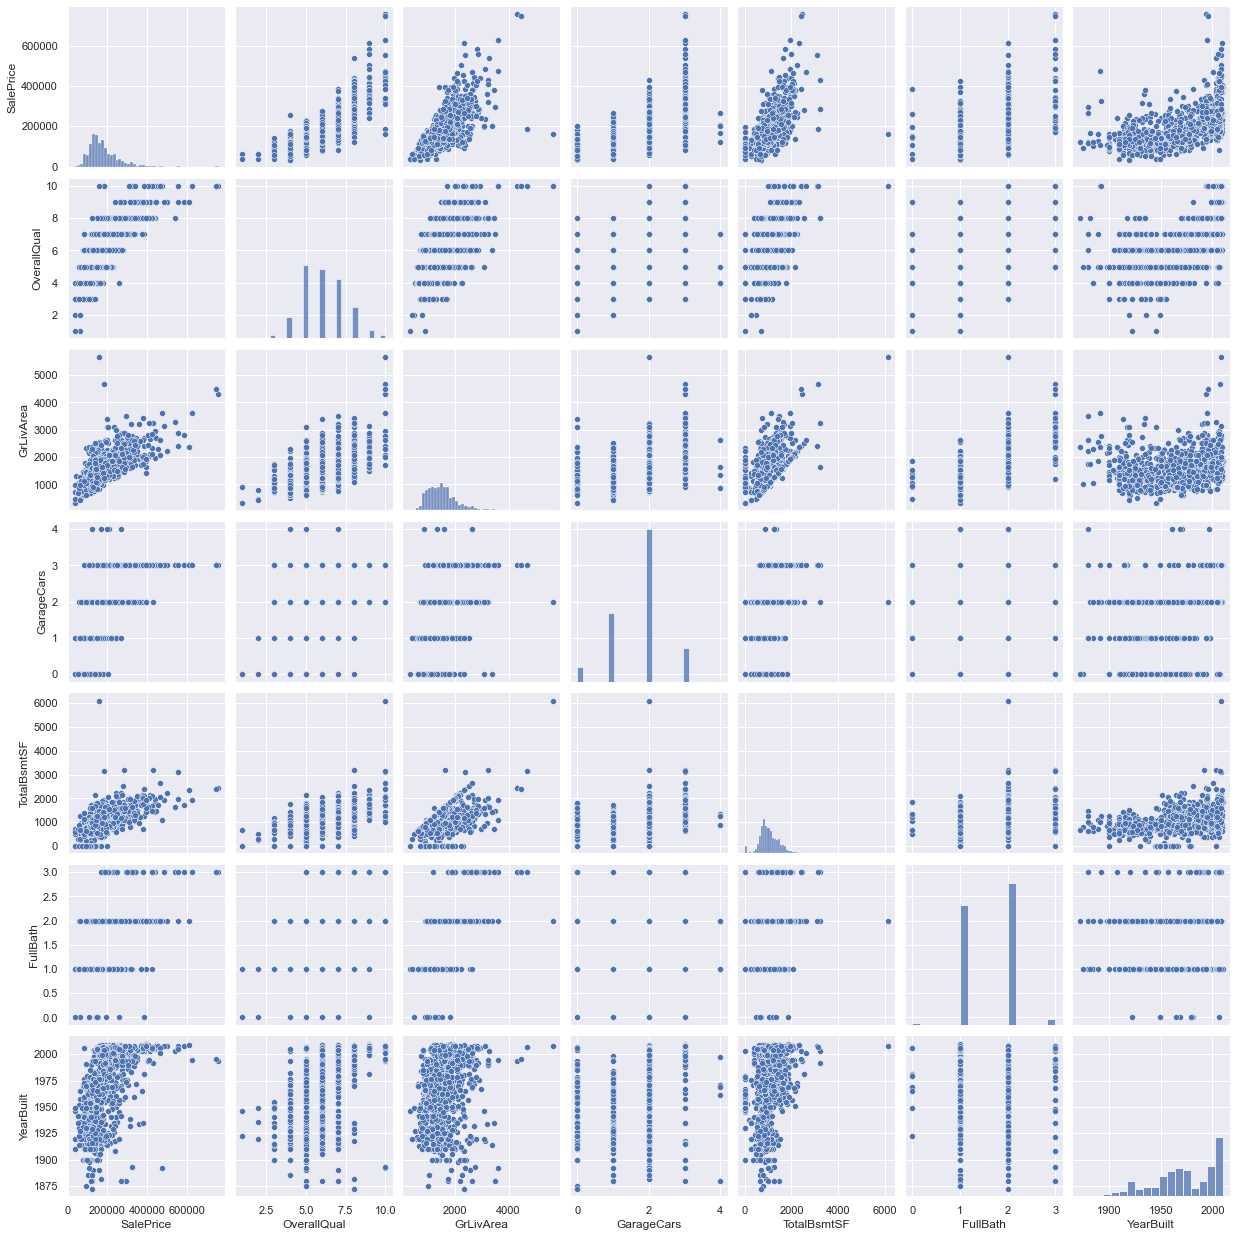

In [62]:
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[columns], size = 2.5)
plt.show()

\ mu = 180921.20 and sigma = 79415.29



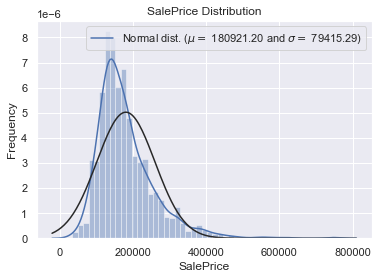

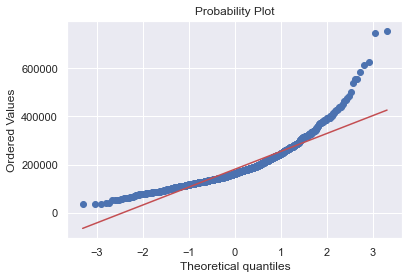

In [63]:
from scipy import stats 
from scipy.stats import norm, skew #for some statistics

sns.distplot(train_data['SalePrice'], fit = norm)

#Get the fitted parameters used by the function

mu, sigma = norm.fit(train_data['SalePrice'])

print('\ mu = {:.2f} and sigma = {:.2f}\n'.format(mu , sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc = 'best')

plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [64]:
train_data.SalePrice = np.log1p(train_data.SalePrice)
y = train_data.SalePrice


### Pre Processing

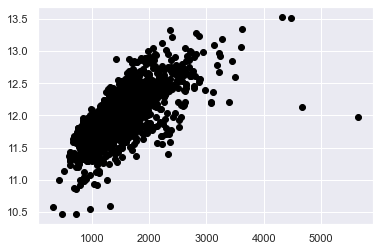

In [65]:
plt.scatter(y = train_data.SalePrice, x = train_data.GrLivArea, c = 'black')
plt.show()

In [66]:
train_next = train_data.isnull().sum()
train_next = train_next[train_next>0]
train_next.sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [67]:
test_next = test_data.isnull().sum()
test_next = test_next[test_next>0]
test_next.sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [68]:
print("Find Most Important Features Relatives To Target")
corr = train_data.corr()
corr.sort_values(['SalePrice'], ascending = False, inplace = True)
print(corr.SalePrice)

Find Most Important Features Relatives To Target
SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch  

In [69]:
#Check For The Numerical Features And Categorical Features

categorical_features = train_data.select_dtypes(include=['object']).columns
print("Following are the categorical features from the training dataset\n\n",categorical_features, "\n\n")

numerical_features = train_data.select_dtypes(exclude = ['object']).columns
print("Following are the numerical features from the training dataset\n\n",numerical_features)

Following are the categorical features from the training dataset

 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object') 


Following are the numerical features from the training dataset

 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF'

In [70]:
numerical_features = numerical_features.drop("SalePrice")
print("Numerical Features: " + str(len(numerical_features)))
print("Categorical Features:" + str(len(categorical_features)))
train_numerical = train_data[numerical_features]
train_categorical = train_data[categorical_features]

Numerical Features: 36
Categorical Features:43


In [71]:
#Filling the missing Values in the dataset
print("Missing Values for numerical features in train_data : " + str(train_numerical.isnull().values.sum()))
train_numerical = train_numerical.fillna(train_numerical.median())

print("Remaining Missing Values for numerical features in train_data :" + str(train_numerical.isnull().values.sum()))

Missing Values for numerical features in train_data : 348
Remaining Missing Values for numerical features in train_data :0


In [72]:
from scipy.stats import skew

skewness = train_numerical.apply(lambda x: skew(x))
skewness.sort_values(ascending = False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
dtype: float64

In [73]:
skewness = skewness[abs(skewness)>0.5]
skewness.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [74]:
skew_features = train_data[skewness.index]
skew_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [75]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.

skew_features = np.log1p(skew_features)

In [76]:
##Lets create dummy features for categorical values via one-hot encoding
train_categorical.shape

(1460, 43)

In [77]:
train_categorical = pd.get_dummies(train_categorical)
train_categorical.shape

(1460, 252)

In [78]:
train_categorical.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [79]:
str(train_categorical.isnull().values.sum())

'0'

# Importing Useful Models

In [80]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer


In [81]:
train_data = pd.concat([train_categorical, train_numerical], axis = 1)
train_data.shape

(1460, 288)

In [82]:
#Lets Split The Data To Train The Model
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.3, random_state = 0)


In [83]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1022, 288), (438, 288), (1022,), (438,))

In [84]:
X_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,0,0,0,1,0,0,1,0,0,0,...,645,576,36,0,0,0,0,0,2,2009
682,0,0,0,1,0,0,1,0,0,0,...,431,307,0,0,0,0,0,0,11,2008
960,0,0,0,1,0,0,1,0,0,1,...,0,117,0,0,0,0,0,0,2,2010
1384,0,0,0,1,0,0,1,0,0,0,...,280,0,0,0,0,0,0,0,10,2009
1100,0,0,0,1,0,0,1,0,0,0,...,246,0,0,0,0,0,0,0,1,2009


In [85]:
y_train.head()

64      12.299112
682     12.061053
960     11.665655
1384    11.561725
1100    11.002117
Name: SalePrice, dtype: float64

## Cross Validation Score Functions

In [99]:
n_folds = 5

from sklearn.model_selection import KFold

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_CV_train(model):
    kf = KFold(n_folds, shuffle = True , random_state = 42).get_n_splits(train_data.values)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring= "neg_mean_squared_error",cv = kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds, shuffle= True, random_state = 42 ).get_n_splits(test_data.values)
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring = "neg_mean_squared_error", cv = kf))
    return (rmse)


### Linear Regression Without Regularization

In [100]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


train_pre = linear_model.predict(X_train)
test_pre = linear_model.predict(X_test)

print("Root Mean Squared Error on Train: ", rmse_CV_train(linear_model).mean())
print("Root Mean Squared Error on Test: ", rmse_CV_test(linear_model).mean())

Root Mean Squared Error on Train:  1971.5181657789358
Root Mean Squared Error on Test:  0.2521132882014176


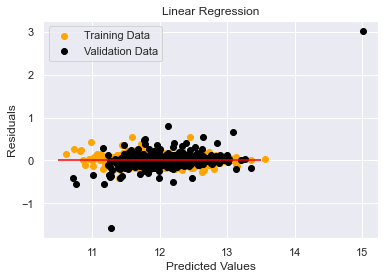

In [91]:
# lets Plot Between Predicted Values and Residuals

plt.scatter(train_pre, train_pre - y_train, c= 'orange', label = 'Training Data')
plt.scatter(test_pre, test_pre - y_test, c = 'black', label = 'Validation Data')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = 'red')
plt.show()

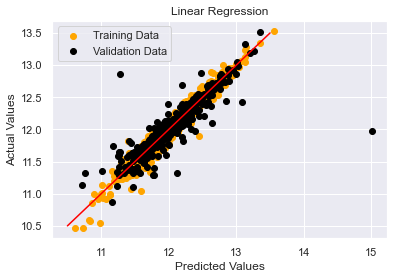

In [96]:
#Lets Plot Predictions - Actual Values

plt.scatter(train_pre, y_train, c = 'orange', label = 'Training Data')
plt.scatter(test_pre,  y_test, c = 'black', label = 'Validation Data')
plt.title('Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend(loc = 'upper left')
plt.plot([10.5, 13.5], [10.5, 13.5], c = 'red')
plt.show()

### RidgeCV

In [101]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

best alpha 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 6.0
Ridge RMSE on Training set : 0.13328081014409324
Ridge RMSE on Test set : 0.17950045447567092


In [103]:
coef = pd.Series(ridge.coef_, index = X_train.columns)

print("Ridge Picked " + str(sum(coef != 0)) + ' variables and eliminated the other ' + str(sum(coef ==0)) + ' variables')


Ridge Picked 280 variables and eliminated the other 8 variables


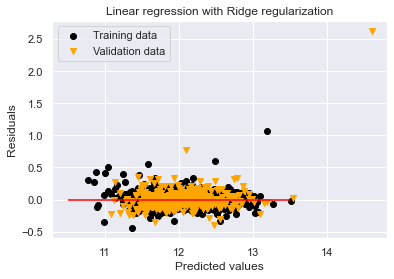

In [104]:
#Lets Plot Residuals

plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "black",  label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "orange", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

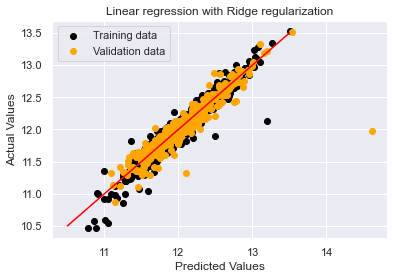

In [105]:
#Lets Plot Predictions - Actual Values
plt.scatter(y_train_rdg, y_train, c = "black",  label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "orange",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()